<a href="https://colab.research.google.com/github/nikhilbansal23/FlaggingLoans/blob/main/Flagging_Loans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [19]:
#importing datasets
df = pd.read_csv('/content/drive/MyDrive/Datasets/Flagging Bad Loans/test_task.csv')

In [20]:
df.head()

,loanKey,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,first_overdue_date,close_loans_cnt,federal_district_nm,TraderKey,payment_type_0,payment_type_1,payment_type_2,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,score_2,age,gender,bad_flag
0,708382,2016-10-06,2015-11-13,NaN,NaN,NaN,NaN,3.0,region_6,6,0,0,10,0,0,0,10.0,NaN,NaN,21.0,False,0
1,406305,2016-03-26,2015-09-28,1.0,0.0,0.0,2016-01-30,0.0,region_6,6,0,0,6,0,0,0,5.0,NaN,NaN,20.0,False,0
2,779736,2016-10-30,2015-12-21,NaN,NaN,NaN,NaN,2.0,region_1,6,0,0,0,5,0,0,5.0,NaN,NaN,19.0,False,0
3,556376,2016-06-29,2015-06-30,NaN,NaN,NaN,NaN,1.0,region_6,14,0,0,4,0,0,0,6.0,NaN,NaN,21.0,False,0
4,266968,2015-12-01,2015-08-03,NaN,NaN,NaN,NaN,0.0,region_5,22,0,3,0,0,0,0,3.0,NaN,NaN,33.0,False,0


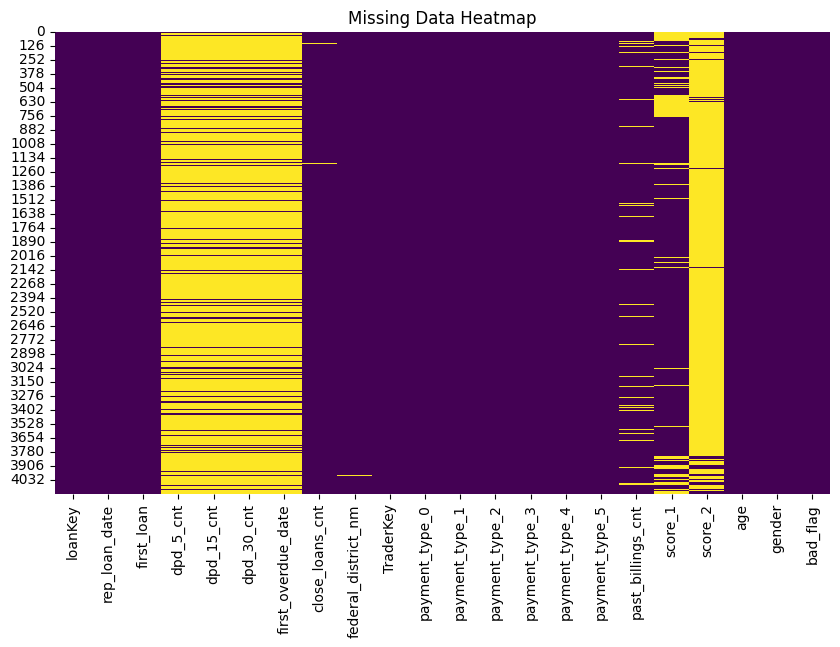

In [21]:
# Check for missing data using heatmap. Looks like we are good to go with missing data handling
missing_data = df.isnull().sum()

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [22]:
# Identify columns ending with '_datetime' and convert them to datetime dtype
datetime_columns = [col for col in df.columns if col.endswith('_date')]
df[datetime_columns] = df[datetime_columns].apply(pd.to_datetime)
df['first_loan'] = df['first_loan'].apply(pd.to_datetime)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4157 entries, 0 to 4156
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loanKey              4157 non-null   int64         
 1   rep_loan_date        4157 non-null   datetime64[ns]
 2   first_loan           4157 non-null   datetime64[ns]
 3   dpd_5_cnt            675 non-null    float64       
 4   dpd_15_cnt           675 non-null    float64       
 5   dpd_30_cnt           675 non-null    float64       
 6   first_overdue_date   675 non-null    datetime64[ns]
 7   close_loans_cnt      4142 non-null   float64       
 8   federal_district_nm  4146 non-null   object        
 9   TraderKey            4157 non-null   int64         
 10  payment_type_0       4157 non-null   int64         
 11  payment_type_1       4157 non-null   int64         
 12  payment_type_2       4157 non-null   int64         
 13  payment_type_3       4157 non-nul

In [24]:
len(df)

4157

In [25]:
df['gender'].value_counts()

False    3570
True      587
Name: gender, dtype: int64